# Introduction to Gillespie Algorithm

- The Gillespie algorithm is a stochastic simulation mehtods that is useful for systems where the number of entites is small enough that random fluctuations have a significant impact on system dynamics.
- In stochastic processes, the next state of the system is not determined entirely by the current state, but involves some randomness. This is in contrast with deterministic processes.

## Propensity
Propensity is a measure of the likelihood of an event occuring in a small time interval.

## Algorithm steps:
1. Initialization
2. Propensity calculation
3. Time to next event
4. Event selection
5. State update
6. Iteration


## Applied to Population Dynamics

### Propensity calculation:
- Birth propensity: given a birth rate $\lambda$, the propensity for a birth event when there are $N$ individuals is $\lambda \cdot N$
- Death propensity: given a death rate $\mu$, the propensity for a death event is $\mu \cdot N$

### Time to next event
The time to next event (either birth or death) is determined by the total propensity of all events, $a_0 = \lambda \cdot N + \mu \cdot N$. The time $\Delta t$ to the next event is sample from an exponential distribution with parameter $a_0$:

$P(\Delta t) = a_0 \exp(-a_0 \Delta t) $

### Event selection
With the probabilities of birth and death $P(birth) = \frac{\lambda \cdot N}{a_0}$ and $P(death) = \frac{\mu \cdot N}{a_0}$. The Gillespie algorithm selects which event occurs next based on these probabilities

### Algorithm steps

1. **Initialization**: Define the initial population size $N$ and set the initial time.
2. **Calculate Propensities**: Compute the birth and death propensities based on the current population size.
3. **Determine $\Delta t$**: Sample the time to the next event from an exponential distribution with mean $1/a_0$.
4. **Select Event**: Choose a birth or death event to occur next, based on their relative probabilities.
5. **Update Population**: Increment or decrement the population size according to the selected event.
6. **Advance Time**: Update the system time by $\Delta t$ and repeat from step 2 until reaching a specified end condition.

## Gillespie simulation specific to population growth

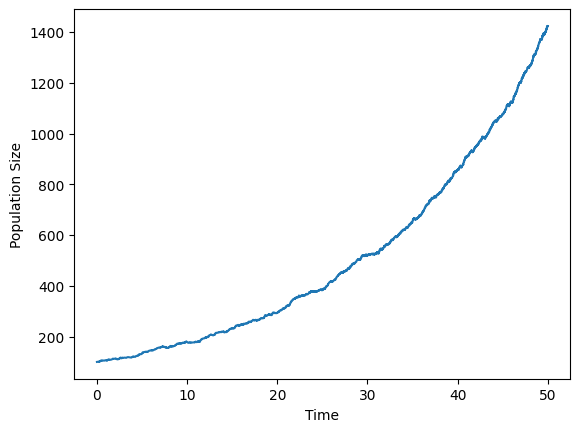

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# parameters
birth_rate = 0.1
death_rate = 0.05
initial_population = 100
max_time = 50

# initialize simulation
population = initial_population
time = 0
times = [time]             # place holder for saved times
populations = [population] # place holder for saved populations

# Gillespie simulation
while time < max_time:
    if population == 0:
        break  # extinction

    # calculate propensities
    birth_propensity = birth_rate * population
    death_propensity = death_rate * population
    total_propensity = birth_propensity + death_propensity

    # determine time to next event
    # sample from an exponential distribution
    time_to_next = np.random.exponential(1/total_propensity)  # todo -- check if this is right
    time += time_to_next

    # select event
    # pick random number in range (0,1)
    if np.random.random() < birth_propensity / total_propensity:
        population += 1  # one birth
    else:
        population -= 1  # one death

    # record the results
    times.append(time)
    populations.append(population)

# plot the results
plt.plot(times, populations)
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.show()

In [5]:
populations[-1]

1426

Ways to break out of a loop:
break
continue
pass